### GAN Implementation

References: 
1. https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-an-mnist-handwritten-digits-from-scratch-in-keras/
2. https://github.com/Ksuryateja/DCGAN-CIFAR10-pytorch/blob/master/gan_cifar.py


Collaborators: Jose Macalintal, Akib Khan

In [1]:
# import necessary packages 
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torchvision.utils as vutils

In [2]:
# check availability of devices
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
# define hyperparameters 
batch_size = 64 
image_size = 28*28   # size of MNIST images
latent_size = 100   # input noise dimension (latent vector size)
hidden_size = 256
num_epochs = 200
lr = 0.0002   # optimizer learning rate

In [4]:
# load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [5]:
# define generator class
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, image_size),
            nn.Tanh() 
        )
    
    def forward(self, input):
        return self.model(input)

# call the generator
G_net = Generator().to(device)

In [6]:
# define discriminator class
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(image_size, hidden_size),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_size, hidden_size),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_size, 1),
            nn.Sigmoid()  
        )
    
    def forward(self, input):
        return self.model(input)

# call the discriminator
D_net = Discriminator().to(device)

In [7]:
# define loss function
criterion = nn.BCELoss()

# store the losses for the discriminator and generator
G_loss = []
D_loss = []

In [8]:
# set up optimizer
optimizer_G = optim.Adam(G_net.parameters(), lr=lr)
optimizer_D = optim.Adam(D_net.parameters(), lr=lr)

In [9]:
# define labels 
def real_labels(size):
    return torch.ones(size, 1).to(device)

def fake_labels(size):
    return torch.zeros(size, 1).to(device)

In [10]:
# define function to visualize the output at various stages of training 
def generate_samples(generator, epoch, num_samples=16): 
    z = torch.randn(num_samples, latent_size).to(device)
    generated_images = generator(z).view(num_samples, 28, 28).cpu().detach()

    fig, axes = plt.subplots(4, 4, figsize=(5, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(generated_images[i], cmap='gray')
        ax.axis('off')
    plt.suptitle(f'Samples at Epoch {epoch}')
    plt.show()

Epoch [0/200], D Loss: 0.10950115323066711, G Loss: 4.1805877685546875
Epoch [1/200], D Loss: 0.39929407835006714, G Loss: 3.187401294708252
Epoch [2/200], D Loss: 1.5656408071517944, G Loss: 2.442054510116577
Epoch [3/200], D Loss: 0.30221155285835266, G Loss: 2.2927567958831787
Epoch [4/200], D Loss: 0.17363101243972778, G Loss: 5.483791828155518
Epoch [5/200], D Loss: 0.06079045310616493, G Loss: 5.753704071044922
Epoch [6/200], D Loss: 0.38545915484428406, G Loss: 4.338143348693848
Epoch [7/200], D Loss: 0.23011283576488495, G Loss: 5.6977338790893555
Epoch [8/200], D Loss: 0.6750583648681641, G Loss: 4.481523513793945
Epoch [9/200], D Loss: 0.45639467239379883, G Loss: 4.2003278732299805
Epoch [10/200], D Loss: 0.407745897769928, G Loss: 3.523615598678589
Epoch [11/200], D Loss: 0.3225541412830353, G Loss: 3.796234130859375
Epoch [12/200], D Loss: 0.19275297224521637, G Loss: 3.6331586837768555
Epoch [13/200], D Loss: 0.30215218663215637, G Loss: 4.365734577178955
Epoch [14/200], 

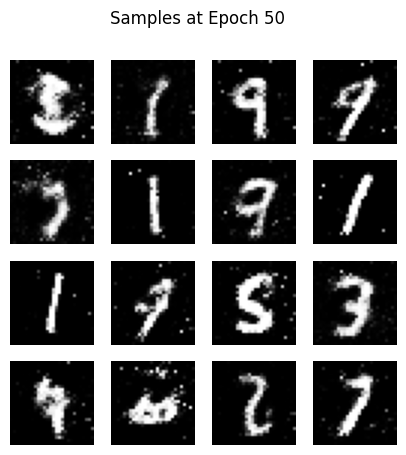

Epoch [51/200], D Loss: 0.7516125440597534, G Loss: 2.043673515319824
Epoch [52/200], D Loss: 0.8001799583435059, G Loss: 2.292840003967285
Epoch [53/200], D Loss: 0.8018527030944824, G Loss: 2.228455066680908
Epoch [54/200], D Loss: 0.721088171005249, G Loss: 1.6693389415740967
Epoch [55/200], D Loss: 0.7701590657234192, G Loss: 1.984938621520996
Epoch [56/200], D Loss: 0.6197739839553833, G Loss: 2.3205204010009766
Epoch [57/200], D Loss: 0.5921609401702881, G Loss: 1.8174140453338623
Epoch [58/200], D Loss: 0.8858770132064819, G Loss: 1.8494374752044678
Epoch [59/200], D Loss: 0.8130915760993958, G Loss: 1.650092363357544
Epoch [60/200], D Loss: 0.7239580750465393, G Loss: 2.4791669845581055
Epoch [61/200], D Loss: 0.8204929828643799, G Loss: 3.0524778366088867
Epoch [62/200], D Loss: 0.7262653112411499, G Loss: 1.5466276407241821
Epoch [63/200], D Loss: 0.8788856863975525, G Loss: 3.1782784461975098
Epoch [64/200], D Loss: 0.9576548337936401, G Loss: 2.16532564163208
Epoch [65/200]

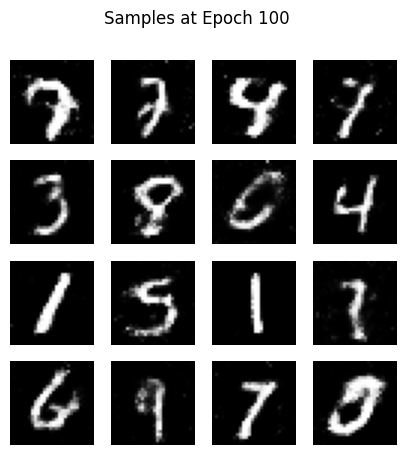

Epoch [101/200], D Loss: 1.2170872688293457, G Loss: 1.312124252319336
Epoch [102/200], D Loss: 0.9393947720527649, G Loss: 1.2795000076293945
Epoch [103/200], D Loss: 0.930438756942749, G Loss: 1.5032774209976196
Epoch [104/200], D Loss: 1.0158252716064453, G Loss: 1.4189709424972534
Epoch [105/200], D Loss: 1.0785428285598755, G Loss: 1.8934850692749023
Epoch [106/200], D Loss: 1.0186179876327515, G Loss: 1.4489682912826538
Epoch [107/200], D Loss: 0.8964762687683105, G Loss: 1.6612548828125
Epoch [108/200], D Loss: 0.8882644176483154, G Loss: 1.7573769092559814
Epoch [109/200], D Loss: 1.2357045412063599, G Loss: 1.196685552597046
Epoch [110/200], D Loss: 1.2542076110839844, G Loss: 1.6521016359329224
Epoch [111/200], D Loss: 0.9771940112113953, G Loss: 1.607478380203247
Epoch [112/200], D Loss: 0.834632158279419, G Loss: 1.3704428672790527
Epoch [113/200], D Loss: 1.049342393875122, G Loss: 1.3590145111083984
Epoch [114/200], D Loss: 0.9167407155036926, G Loss: 1.6741199493408203
E

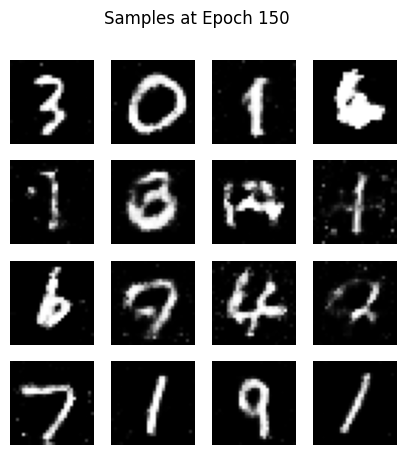

Epoch [151/200], D Loss: 1.0282260179519653, G Loss: 1.4052627086639404
Epoch [152/200], D Loss: 0.8506981134414673, G Loss: 1.302763819694519
Epoch [153/200], D Loss: 1.235138177871704, G Loss: 1.6703135967254639
Epoch [154/200], D Loss: 1.0487041473388672, G Loss: 1.6077461242675781
Epoch [155/200], D Loss: 0.8720431327819824, G Loss: 1.4650357961654663
Epoch [156/200], D Loss: 1.2291314601898193, G Loss: 1.1107341051101685
Epoch [157/200], D Loss: 1.0253722667694092, G Loss: 1.1061656475067139
Epoch [158/200], D Loss: 1.0112788677215576, G Loss: 1.6324639320373535
Epoch [159/200], D Loss: 1.304231882095337, G Loss: 1.1978312730789185
Epoch [160/200], D Loss: 1.283196210861206, G Loss: 1.1738920211791992
Epoch [161/200], D Loss: 1.3544857501983643, G Loss: 1.7019298076629639
Epoch [162/200], D Loss: 0.6972490549087524, G Loss: 1.7531013488769531
Epoch [163/200], D Loss: 1.0171562433242798, G Loss: 1.5435503721237183
Epoch [164/200], D Loss: 1.0470229387283325, G Loss: 1.6245198249816

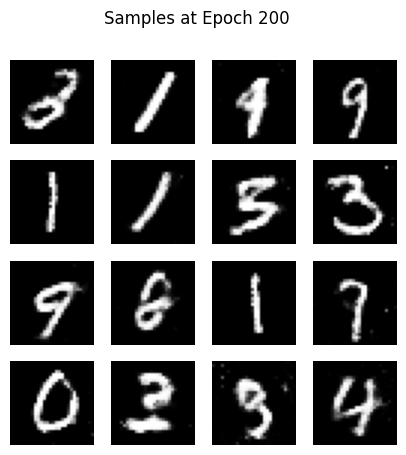

In [11]:
# train the network
for epoch in range(num_epochs):
    d_loss_epoch = 0.0
    g_loss_epoch = 0.0
    
    for i, (images, _) in enumerate(data_loader):

        # train discriminator with real images
        images = images.view(images.size(0), -1).to(device)
    
        real = real_labels(images.size(0))
        fake = fake_labels(images.size(0))
        
        optimizer_D.zero_grad()
        real_output = D_net(images)
        d_loss_real = criterion(real_output, real)
        
        # train discriminator with fake images
        z = torch.randn(images.size(0), latent_size).to(device)
        fake_images = G_net(z)
        fake_output = D_net(fake_images)
        d_loss_fake = criterion(fake_output, fake)
        
        # discriminator loss and backpropagation 
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_D.step()
        
        # train generator
        optimizer_G.zero_grad()
        z = torch.randn(images.size(0), latent_size).to(device)
        fake_images = G_net(z)
        output = D_net(fake_images)
        
        # generator loss and backpropagation 
        g_loss = criterion(output, real)
        g_loss.backward()
        optimizer_G.step()

        # accumulate losses
        d_loss_epoch += d_loss.item()
        g_loss_epoch += g_loss.item()

    # print the loss at each epoch 
    print(f"Epoch [{epoch}/{num_epochs}], D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")
    
    # store the average loss for this epoch
    D_loss.append(d_loss_epoch / len(data_loader))
    G_loss.append(g_loss_epoch / len(data_loader))
    
    # generate samples after 50, 100, 150 epochs
    if epoch in [50, 100, 150]:
        generate_samples(G_net, epoch)

# generate samples after 200 epochs
generate_samples(G_net, num_epochs)

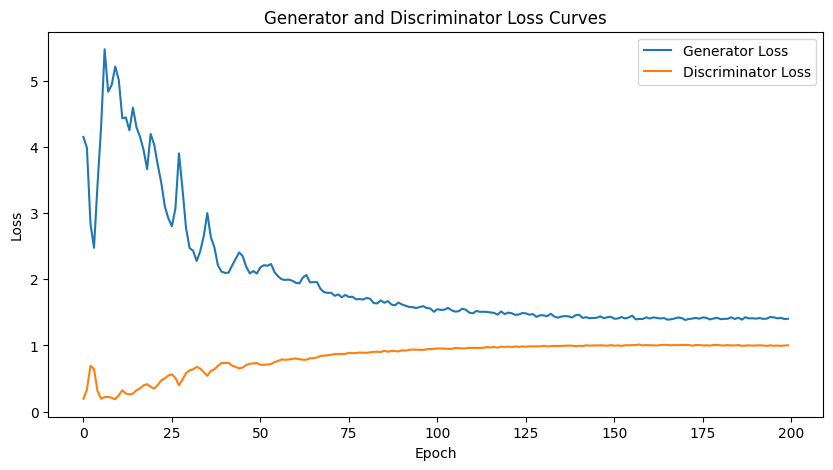

In [12]:
# plot the loss curves
plt.figure(figsize=(10, 5))
plt.plot(G_loss, label="Generator Loss")
plt.plot(D_loss, label="Discriminator Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Generator and Discriminator Loss Curves")
plt.legend()
plt.show()

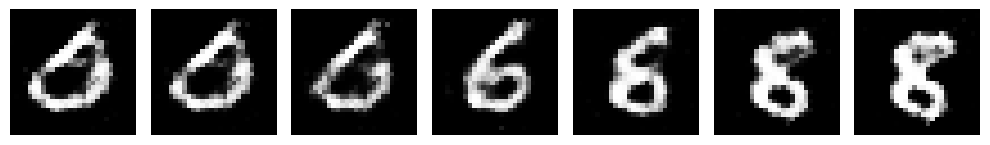

In [13]:
# latent space interpolation 
z1 = torch.randn(1, latent_size, device=device)
z2 = torch.randn(1, latent_size, device=device)

z_interp = torch.zeros((7, latent_size))
z_interp[0, :] = z1
z_interp[1, :] = z1*0.90 + z2*0.10
z_interp[2, :] = z1*0.75 + z2*0.25
z_interp[3, :] = z1*0.50 + z2*0.50
z_interp[4, :] = z1*0.25 + z2*0.75
z_interp[5, :] = z1*0.10 + z2*0.90
z_interp[6, :] = z2

z_interp = z_interp.to(device)

# visualize results of interpolation
with torch.no_grad():
    image_interp = G_net(z_interp).detach().cpu()
    image_interp = image_interp.view(7, 28, 28).cpu().detach()

fig, axs = plt.subplots(ncols=7, figsize=(10, 5))
for i in range(7):
    axs[i].imshow(image_interp[i], cmap='gray')
    axs[i].axis('off')
plt.tight_layout()
plt.show()

### DCGAN for Image Generation

In [14]:
# define hyperparameters 
batch_size = 128 
image_size = 32   # size of CIFAR-10 images
latent_size = 100   # input noise dimension (latent vector size) 
ngf = 64   # number of generator filters (generator feature map size)
ndf = 64   # number of discriminator filters (discriminator feature map size) 
num_epochs = 50 
lr = 0.0002   # optimizer learning rate

In [15]:
# check availability of devices 
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [16]:
# load CIFAR-10 dataset
transform = transforms.Compose([transforms.Resize(image_size), transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

Files already downloaded and verified


In [17]:
# define generator class 
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # input is latent vector z, going into a convolution 
            # 100 neurons -> 64*8 output channels, kernels = 4, no padding, strided 1
            nn.ConvTranspose2d(latent_size, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # shape: (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # shape: (ngf*4) x 8 x 8
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # shape: (ngf*2) x 16 x 16
            nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # shape: (ngf) x 32 x 32
            nn.ConvTranspose2d(ngf, 3, 3, 1, 1, bias=False),
            nn.Tanh()
            # output size is 3 x 32 x 32
        )

    def forward(self, input):
        return self.main(input)

# call the generator 
G_net = Generator().to(device)

In [18]:
# define discriminator class 
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # input size is  3 x 32 x 32
            nn.Conv2d(3, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # shape: (ndf) x 16 x 16
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # shape: (ndf*2) x 8 x 8
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # shape: (ndf*4) x 4 x 4
            nn.Conv2d(ndf * 4, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
            # output size is 1
        )

    def forward(self, input):
        return self.main(input)

# call the discriminator
D_net = Discriminator().to(device)

In [19]:
# define loss function
criterion = nn.BCELoss()

# store the losses for the discriminator and generator
G_loss = []
D_loss = []

In [20]:
# set up optimizer
optimizer_G = optim.Adam(G_net.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(D_net.parameters(), lr=lr, betas=(0.5, 0.999))

In [21]:
# define labels 
real_label = 1 
fake_label = 0

In [22]:
# define fixed noise 
fixed_noise = torch.randn(64, latent_size, 1, 1, device=device)

In [27]:
# train the network
for epoch in range(num_epochs):
    for i, data in enumerate(data_loader, 0):
        
        # train discriminator with real images
        D_net.zero_grad()
        real_images = data[0].to(device)
        batch_size = real_images.size(0)
        labels = torch.full((batch_size,), real_label, dtype=torch.float, device=device)
        output = D_net(real_images).view(-1)
        d_loss_real = criterion(output, labels)
        d_loss_real.backward()

        # train discriminator with fake images
        noise = torch.randn(batch_size, latent_size, 1, 1, device=device)
        fake_images = G_net(noise)
        labels.fill_(fake_label)
        output = D_net(fake_images.detach()).view(-1)
        d_loss_fake = criterion(output, labels)
        d_loss_fake.backward()
        optimizer_D.step()

        # train generator
        G_net.zero_grad()
        labels.fill_(real_label)
        output = D_net(fake_images).view(-1)
        g_loss = criterion(output, labels)
        g_loss.backward()
        optimizer_G.step()

        # print the loss at each epoch
        if i % 100 == 0:
            print(f"Epoch [{epoch}/{num_epochs}] Step [{i}/{len(data_loader)}] D Loss: {d_loss_real + d_loss_fake}, G Loss: {g_loss}")

        # store the average loss for this epoch
        G_loss.append(g_loss.item())
        D_loss.append((d_loss_real + d_loss_fake).item())

Epoch [0/50] Step [0/391] D Loss: 1.7502305507659912, G Loss: 1.5602171421051025
Epoch [0/50] Step [100/391] D Loss: 0.06558317691087723, G Loss: 7.18387508392334
Epoch [0/50] Step [200/391] D Loss: 0.39877042174339294, G Loss: 3.2662205696105957
Epoch [0/50] Step [300/391] D Loss: 0.541320264339447, G Loss: 2.5235328674316406
Epoch [1/50] Step [0/391] D Loss: 0.7723199129104614, G Loss: 2.2822108268737793
Epoch [1/50] Step [100/391] D Loss: 0.6808631420135498, G Loss: 2.614628791809082
Epoch [1/50] Step [200/391] D Loss: 0.7225178480148315, G Loss: 2.459425926208496
Epoch [1/50] Step [300/391] D Loss: 0.9206510782241821, G Loss: 2.128016710281372
Epoch [2/50] Step [0/391] D Loss: 0.7708471417427063, G Loss: 2.6077191829681396
Epoch [2/50] Step [100/391] D Loss: 0.9341790676116943, G Loss: 2.189897060394287
Epoch [2/50] Step [200/391] D Loss: 1.1030751466751099, G Loss: 1.9388123750686646
Epoch [2/50] Step [300/391] D Loss: 1.4363740682601929, G Loss: 1.6958876848220825
Epoch [3/50] St

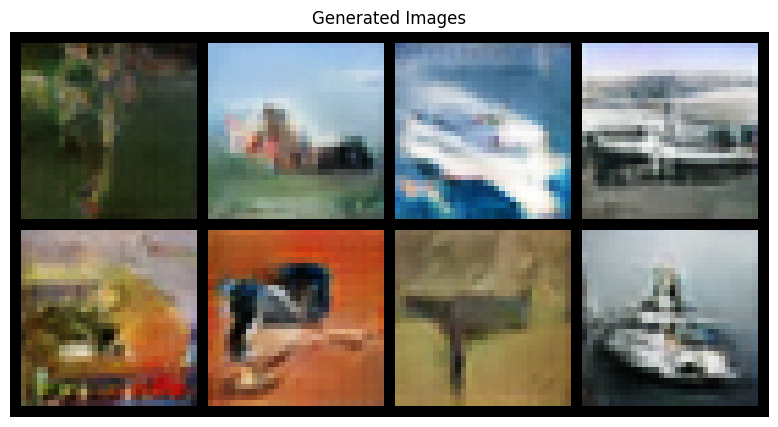

In [28]:
# visualize the generated iamges 
G_net.eval()
noise = torch.randn(8, latent_size, 1, 1, device=device)
with torch.no_grad(): 
    generated_images = G_net(noise).detach().cpu()

plt.figure(figsize=(10, 5))  
plt.axis("off")
plt.title("Generated Images")
plt.imshow(np.transpose(vutils.make_grid(generated_images, padding=2, normalize=True, nrow=4), (1, 2, 0))) 
plt.show()

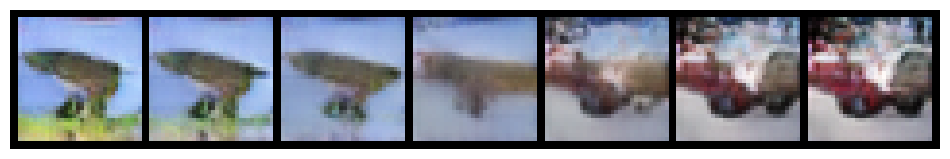

In [30]:
# latent space interpolation
z1 = torch.randn(1, latent_size, 1, 1, device=device)
z2 = torch.randn(1, latent_size, 1, 1, device=device)

z_interp = torch.zeros((7, latent_size, 1, 1))
z_interp[0, :] = z1
z_interp[1, :] = z1*0.90 + z2*0.10
z_interp[2, :] = z1*0.75 + z2*0.25
z_interp[3, :] = z1*0.50 + z2*0.50
z_interp[4, :] = z1*0.25 + z2*0.75
z_interp[5, :] = z1*0.10 + z2*0.90
z_interp[6, :] = z2

z_interp = z_interp.to(device)

# visualize results of interpolation
with torch.no_grad():
    image_interp = G_net(z_interp).detach().cpu()

plt.figure(figsize=(12, 7))
plt.imshow(np.transpose(vutils.make_grid(image_interp, padding=2, normalize=True, nrow=7), (1, 2, 0)))
plt.axis('off')
plt.show()